In [70]:
import collections
import dataclasses
import typing as tp

import networkx as nx
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [82]:
tree = nx.read_graphml('sample-data/tree-test-dense.xml')

ValueError: Received invalid argument(s): figsize

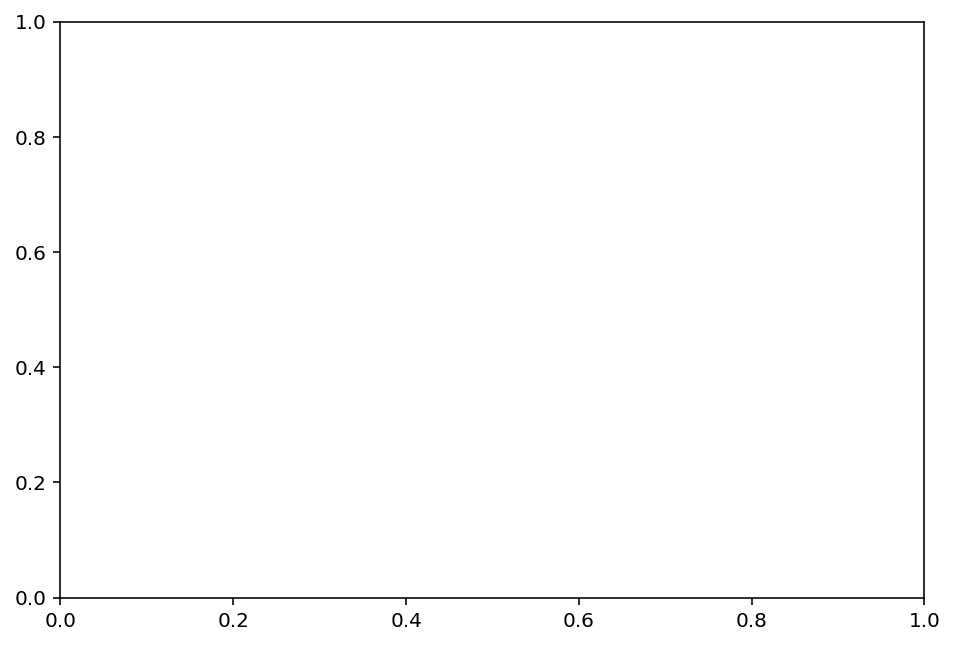

In [84]:
def _get_basic_layered_layout(
    tree: nx.DiGraph, root: str
) -> tp.Dict[str, tp.Tuple[float, float]]:
    
    layout: tp.Dict[str, tp.Tuple[float, float]] = {}
    stack: tp.List[tp.Tuple[str, int]] = [(root, 0)]
    inorder_id = 0

    while stack:
        node, depth = stack[-1]
        children = list(nx.neighbors(tree, node))
        if all(child in layout for child in children):
            layout[node] = (inorder_id, -depth)
            inorder_id += 1
            stack.pop()
        else:
            for child in children:
                if child not in layout:
                    stack.append((child, depth + 1))
                
    return layout


def get_layered_layout(
    tree: nx.DiGraph, root: str
) -> tp.Dict[str, tp.Tuple[float, float]]:
    
    basic_layout = _get_basic_layered_layout(tree, root)
    improved_layout: tp.Dict[str, tp.Tuple[float, float]] = {}
    stack: tp.List[str] = [root]
        
    while stack:
        node = stack[-1]
        children = list(nx.neighbors(tree, node))
        if all(child in improved_layout for child in children):
            children_x_coords = [
                improved_layout[child][0] for child in children
            ]
            improved_x_coord = (
                basic_layout[node][0] 
                if not children 
                else (
                    min(children_x_coords) 
                    + (max(children_x_coords) - min(children_x_coords)) / 2
                )
            )
            improved_y_coord = basic_layout[node][1] 
            improved_layout[node] = (improved_x_coord, improved_y_coord)
            stack.pop()
        else:
            for child in children:
                if child not in improved_layout:
                    stack.append(child)
                    
    return improved_layout
    
    
layout = get_layered_layout(tree, root='n0')
nx.draw(tree, pos=layout, with_labels=True, figsize=(10,10))